In [1]:
import torch
import tqdm

from torchmetrics import ConfusionMatrix

import matplotlib.pyplot as plt
import seaborn as sns

from hydra import initialize, compose
from hydra.utils import instantiate
from pytorch_lightning.utilities import move_data_to_device

from bliss.surveys.dc2 import DC2DataModule
from case_studies.dc2_new_diffusion.utils.encoder import YNetDoubleDetectDiffusionEncoder

In [2]:
model_name = "exp_02-05-1"
model_check_point_name = "encoder_48.ckpt"
model_path = f"../../../bliss_output/DC2_ynet_dd_diffusion_exp/{model_name}/checkpoints/{model_check_point_name}"
device = torch.device("cuda:5" if torch.cuda.is_available() else "cpu")
with initialize(config_path="./ynet_dd_diffusion_config", version_base=None):
    new_diffusion_notebook_cfg = compose("ynet_dd_diffusion_notebook_config")

In [3]:
tile_slen = new_diffusion_notebook_cfg.surveys.dc2.tile_slen
max_sources_per_tile = new_diffusion_notebook_cfg.surveys.dc2.max_sources_per_tile
r_band_min_flux = new_diffusion_notebook_cfg.notebook_var.r_band_min_flux

dc2: DC2DataModule = instantiate(new_diffusion_notebook_cfg.surveys.dc2)
dc2.batch_size = 512
dc2.setup(stage="validate")
dc2_val_dataloader = dc2.val_dataloader()

bliss_encoder: YNetDoubleDetectDiffusionEncoder = instantiate(new_diffusion_notebook_cfg.encoder).to(device=device)
pretrained_weights = torch.load(model_path, map_location=device)["state_dict"]
bliss_encoder.load_state_dict(pretrained_weights)
bliss_encoder.eval();

In [4]:
print(bliss_encoder.ddim_steps)
print(bliss_encoder.ddim_objective)
print(bliss_encoder.ddim_beta_schedule)

5
pred_x0
linear


In [5]:
print(bliss_encoder.catalog_parser.factors[0].threshold)

0.0


In [6]:
bliss_encoder.catalog_parser.factors[0].threshold = 0.0

In [7]:
ddim_steps = 5
bliss_encoder.ddim_steps = ddim_steps
bliss_encoder.detection_diffusion.sampling_timesteps = ddim_steps

In [8]:
locs_slack_list = [0.01, 0.05, 0.1, 0.15, 0.2]
init_time_list = [0, 1, 5, 10, 20]

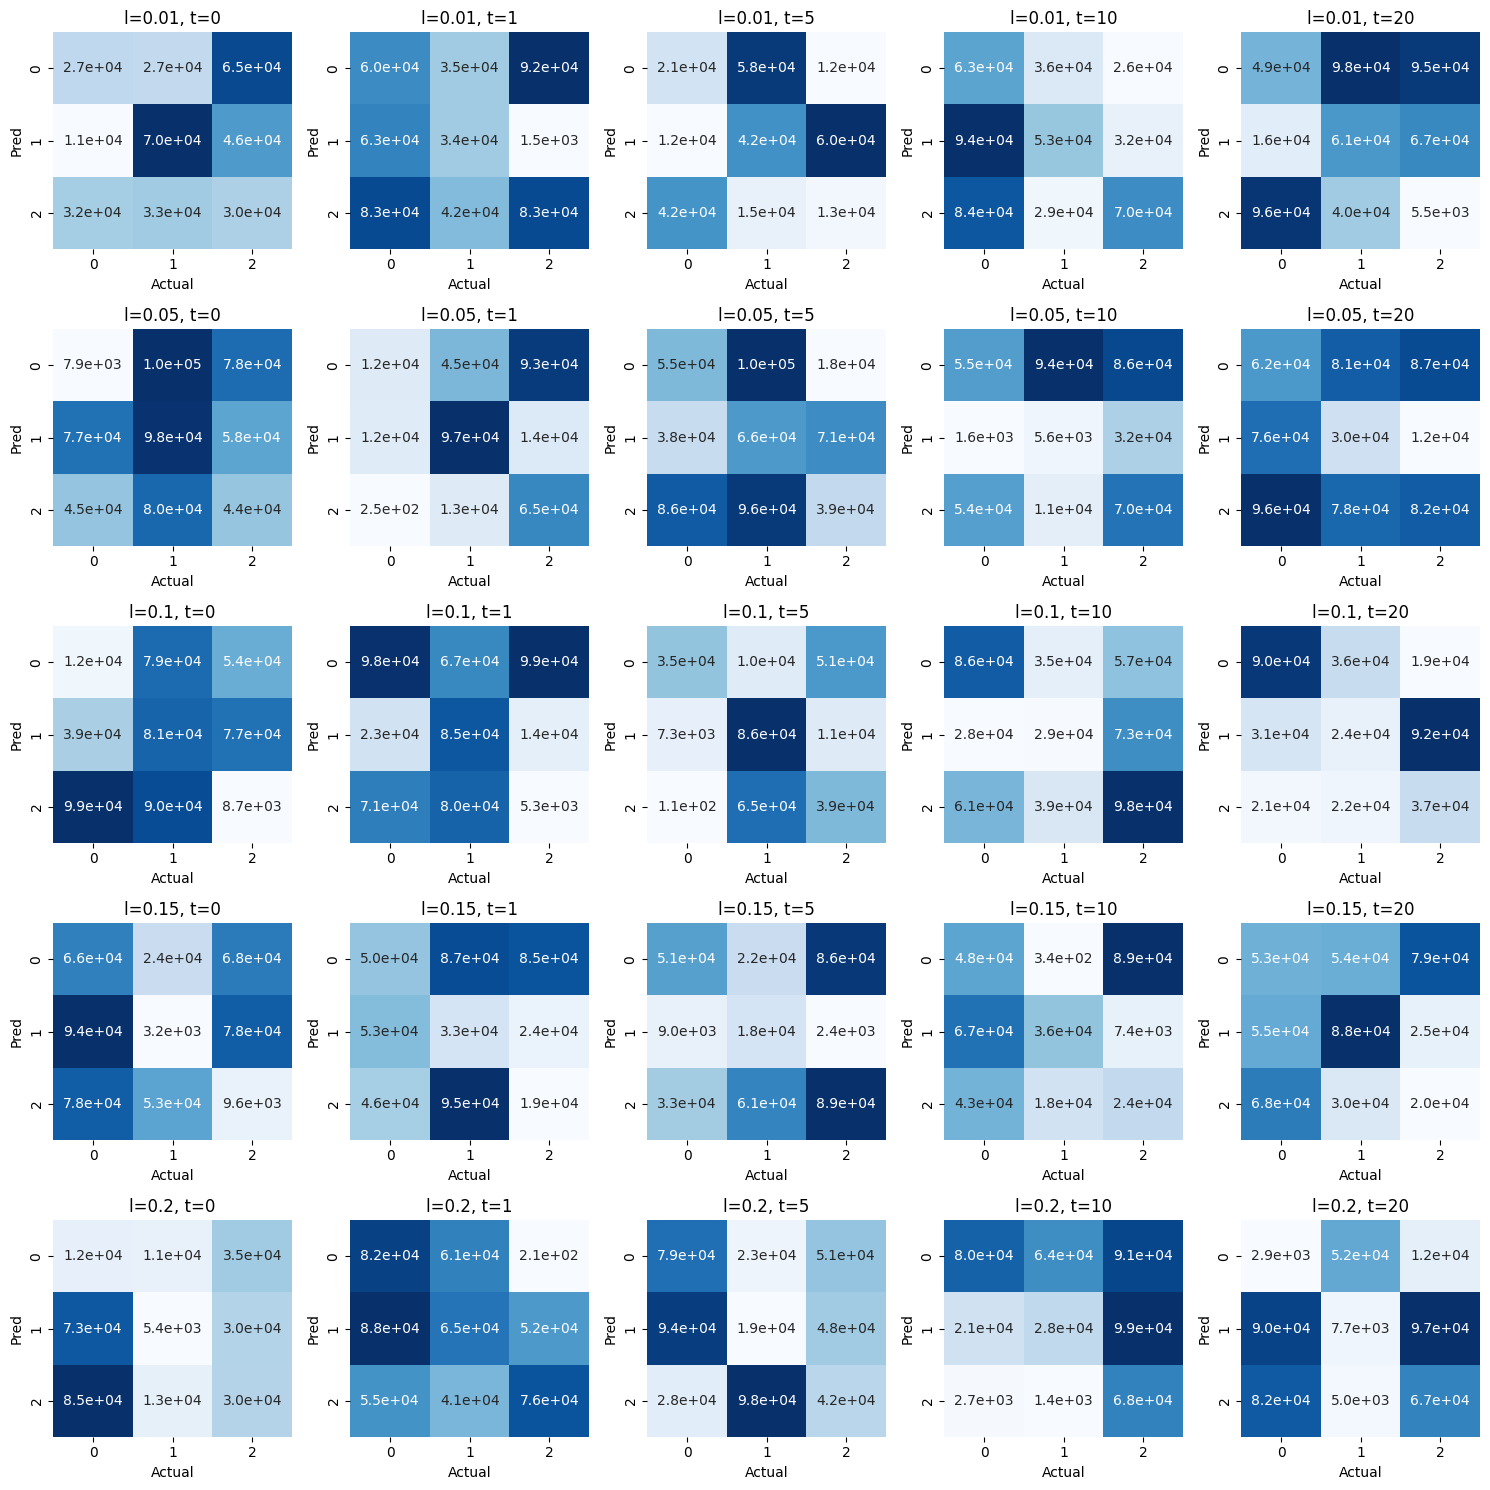

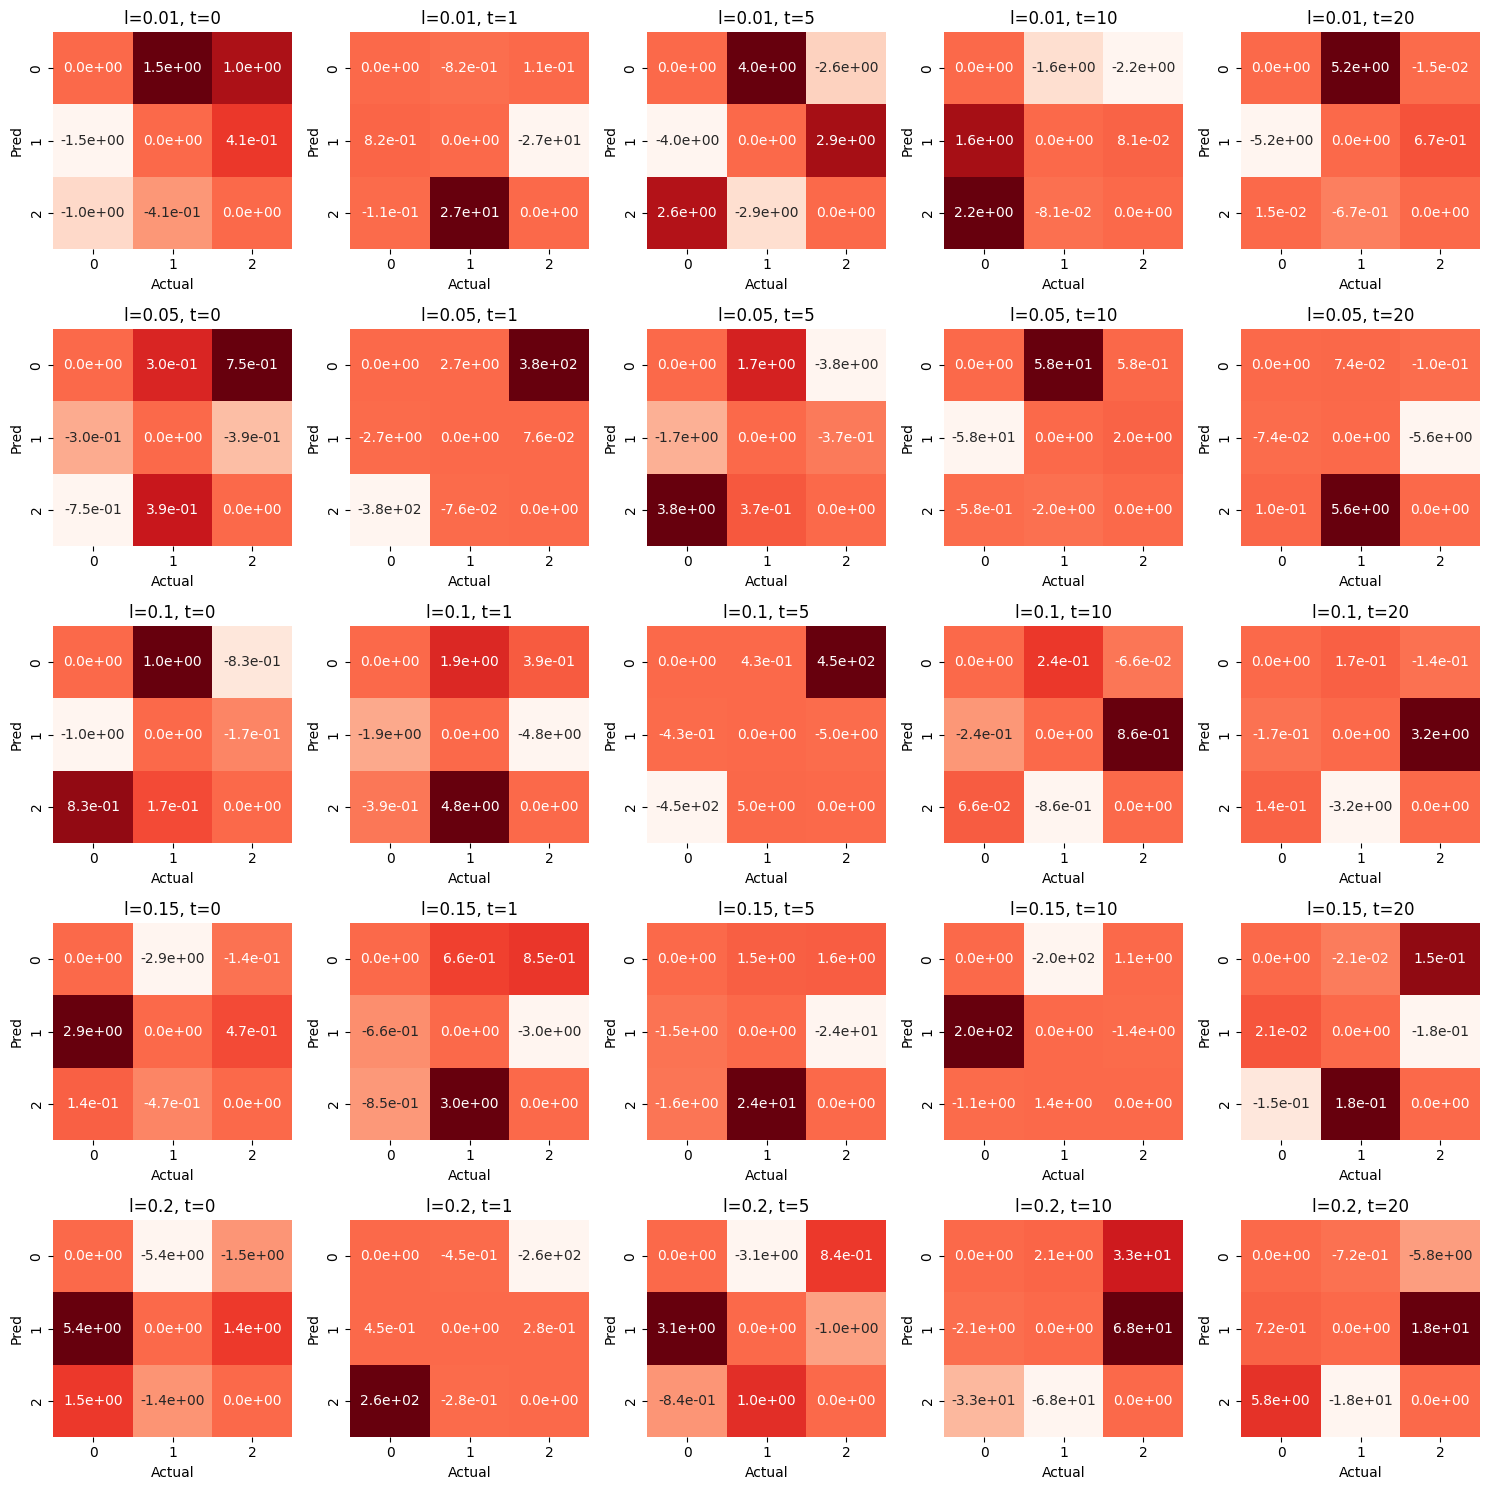

In [9]:
fig, axes = plt.subplots(len(locs_slack_list), len(init_time_list), 
                         figsize=(len(init_time_list) * 3, len(locs_slack_list) * 3))
fig_f, axes_f = plt.subplots(len(locs_slack_list), len(init_time_list), 
                             figsize=(len(init_time_list) * 3, len(locs_slack_list) * 3))
for i, locs_slack in enumerate(locs_slack_list):
    for j, init_time in enumerate(init_time_list):
        cm = torch.randint(0, 100000, (3, 3), dtype=torch.long)
        ax = axes[i, j]
        sns.heatmap(cm.numpy(), 
                    annot=True, 
                    fmt=".1e", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"l={locs_slack}, t={init_time}")
        ax.set_xlabel("Actual")
        ax.set_ylabel("Pred")

        cm_d = torch.minimum(cm, cm.T)
        cm_f = ((cm - cm.T) / cm_d).nan_to_num(0.0)
        ax_f = axes_f[i, j]
        sns.heatmap(cm_f.numpy(), 
                    annot=True, 
                    fmt=".1e", cmap="Reds", cbar=False, ax=ax_f)
        ax_f.set_title(f"l={locs_slack}, t={init_time}")
        ax_f.set_xlabel("Actual")
        ax_f.set_ylabel("Pred")

fig.tight_layout()
fig.show()

fig_f.tight_layout()
fig_f.show()

100%|██████████| 49/49 [02:04<00:00,  2.54s/it]


(ddim_steps=5, locs_slack=0.01, init_time=0)
tensor([[9816602,   27878,      34],
        [   4305,   27269,     226],
        [  27282,   95317,    1087]])


100%|██████████| 49/49 [02:04<00:00,  2.54s/it]


(ddim_steps=5, locs_slack=0.01, init_time=1)
tensor([[9816458,   28016,      26],
        [   4263,   27211,     234],
        [  27468,   95237,    1087]])


100%|██████████| 49/49 [02:05<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.01, init_time=5)
tensor([[9816372,   28061,      34],
        [   4211,   27008,     216],
        [  27606,   95395,    1097]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.01, init_time=10)
tensor([[9816561,   27975,      35],
        [   4204,   26484,     210],
        [  27424,   96005,    1102]])


100%|██████████| 49/49 [02:04<00:00,  2.54s/it]


(ddim_steps=5, locs_slack=0.01, init_time=20)
tensor([[9816614,   28042,      29],
        [   3582,   22988,     195],
        [  27993,   99434,    1123]])


100%|██████████| 49/49 [02:04<00:00,  2.54s/it]


(ddim_steps=5, locs_slack=0.05, init_time=0)
tensor([[9816387,   28045,      35],
        [  26544,  114909,    1155],
        [   5258,    7510,     157]])


100%|██████████| 49/49 [02:04<00:00,  2.54s/it]


(ddim_steps=5, locs_slack=0.05, init_time=1)
tensor([[9816521,   27983,      25],
        [  26340,  114933,    1171],
        [   5328,    7548,     151]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.05, init_time=5)
tensor([[9816568,   27989,      36],
        [  26257,  115005,    1178],
        [   5364,    7470,     133]])


100%|██████████| 49/49 [02:04<00:00,  2.54s/it]


(ddim_steps=5, locs_slack=0.05, init_time=10)
tensor([[9816349,   28107,      34],
        [  26060,  114383,    1154],
        [   5780,    7974,     159]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.05, init_time=20)
tensor([[9816666,   27825,      38],
        [  23972,  112068,    1134],
        [   7551,   10571,     175]])


100%|██████████| 49/49 [02:05<00:00,  2.56s/it]


(ddim_steps=5, locs_slack=0.1, init_time=0)
tensor([[9816605,   27970,      39],
        [  31232,  122107,    1283],
        [    352,     387,      25]])


100%|██████████| 49/49 [02:04<00:00,  2.54s/it]


(ddim_steps=5, locs_slack=0.1, init_time=1)
tensor([[9816492,   28073,      32],
        [  31336,  121934,    1299],
        [    361,     457,      16]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.1, init_time=5)
tensor([[9816610,   27945,      29],
        [  31221,  122118,    1305],
        [    358,     401,      13]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.1, init_time=10)
tensor([[9816481,   28020,      29],
        [  31286,  121968,    1301],
        [    422,     476,      17]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.1, init_time=20)
tensor([[9816603,   27821,      32],
        [  30627,  121690,    1292],
        [    959,     953,      23]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.15, init_time=0)
tensor([[9816547,   27991,      31],
        [  31630,  122437,    1314],
        [     12,      36,       2]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.15, init_time=1)
tensor([[9816356,   27993,      33],
        [  31824,  122432,    1312],
        [      9,      39,       2]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.15, init_time=5)
tensor([[9816612,   27920,      31],
        [  31559,  122504,    1312],
        [     18,      40,       4]])


100%|██████████| 49/49 [02:05<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.15, init_time=10)
tensor([[9816528,   27952,      35],
        [  31642,  122474,    1311],
        [     19,      38,       1]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.15, init_time=20)
tensor([[9816702,   28025,      29],
        [  31396,  122358,    1312],
        [     91,      81,       6]])


100%|██████████| 49/49 [02:05<00:00,  2.56s/it]


(ddim_steps=5, locs_slack=0.2, init_time=0)
tensor([[9816592,   27961,      26],
        [  31596,  122501,    1321],
        [      1,       2,       0]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.2, init_time=1)
tensor([[9816381,   28041,      34],
        [  31806,  122417,    1313],
        [      2,       6,       0]])


100%|██████████| 49/49 [02:05<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.2, init_time=5)
tensor([[9816446,   28165,      26],
        [  31742,  122299,    1321],
        [      1,       0,       0]])


/home/pduan/bliss/.venv/lib/python3.10/site-packages/matplotlib/colors.py:1354: RuntimeWarning: overflow encountered in subtract
  resdat -= vmin
100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.2, init_time=10)
tensor([[9816538,   27920,      27],
        [  31648,  122536,    1319],
        [      3,       8,       1]])


100%|██████████| 49/49 [02:04<00:00,  2.55s/it]


(ddim_steps=5, locs_slack=0.2, init_time=20)
tensor([[9816510,   27943,      23],
        [  31675,  122514,    1323],
        [      4,       7,       1]])


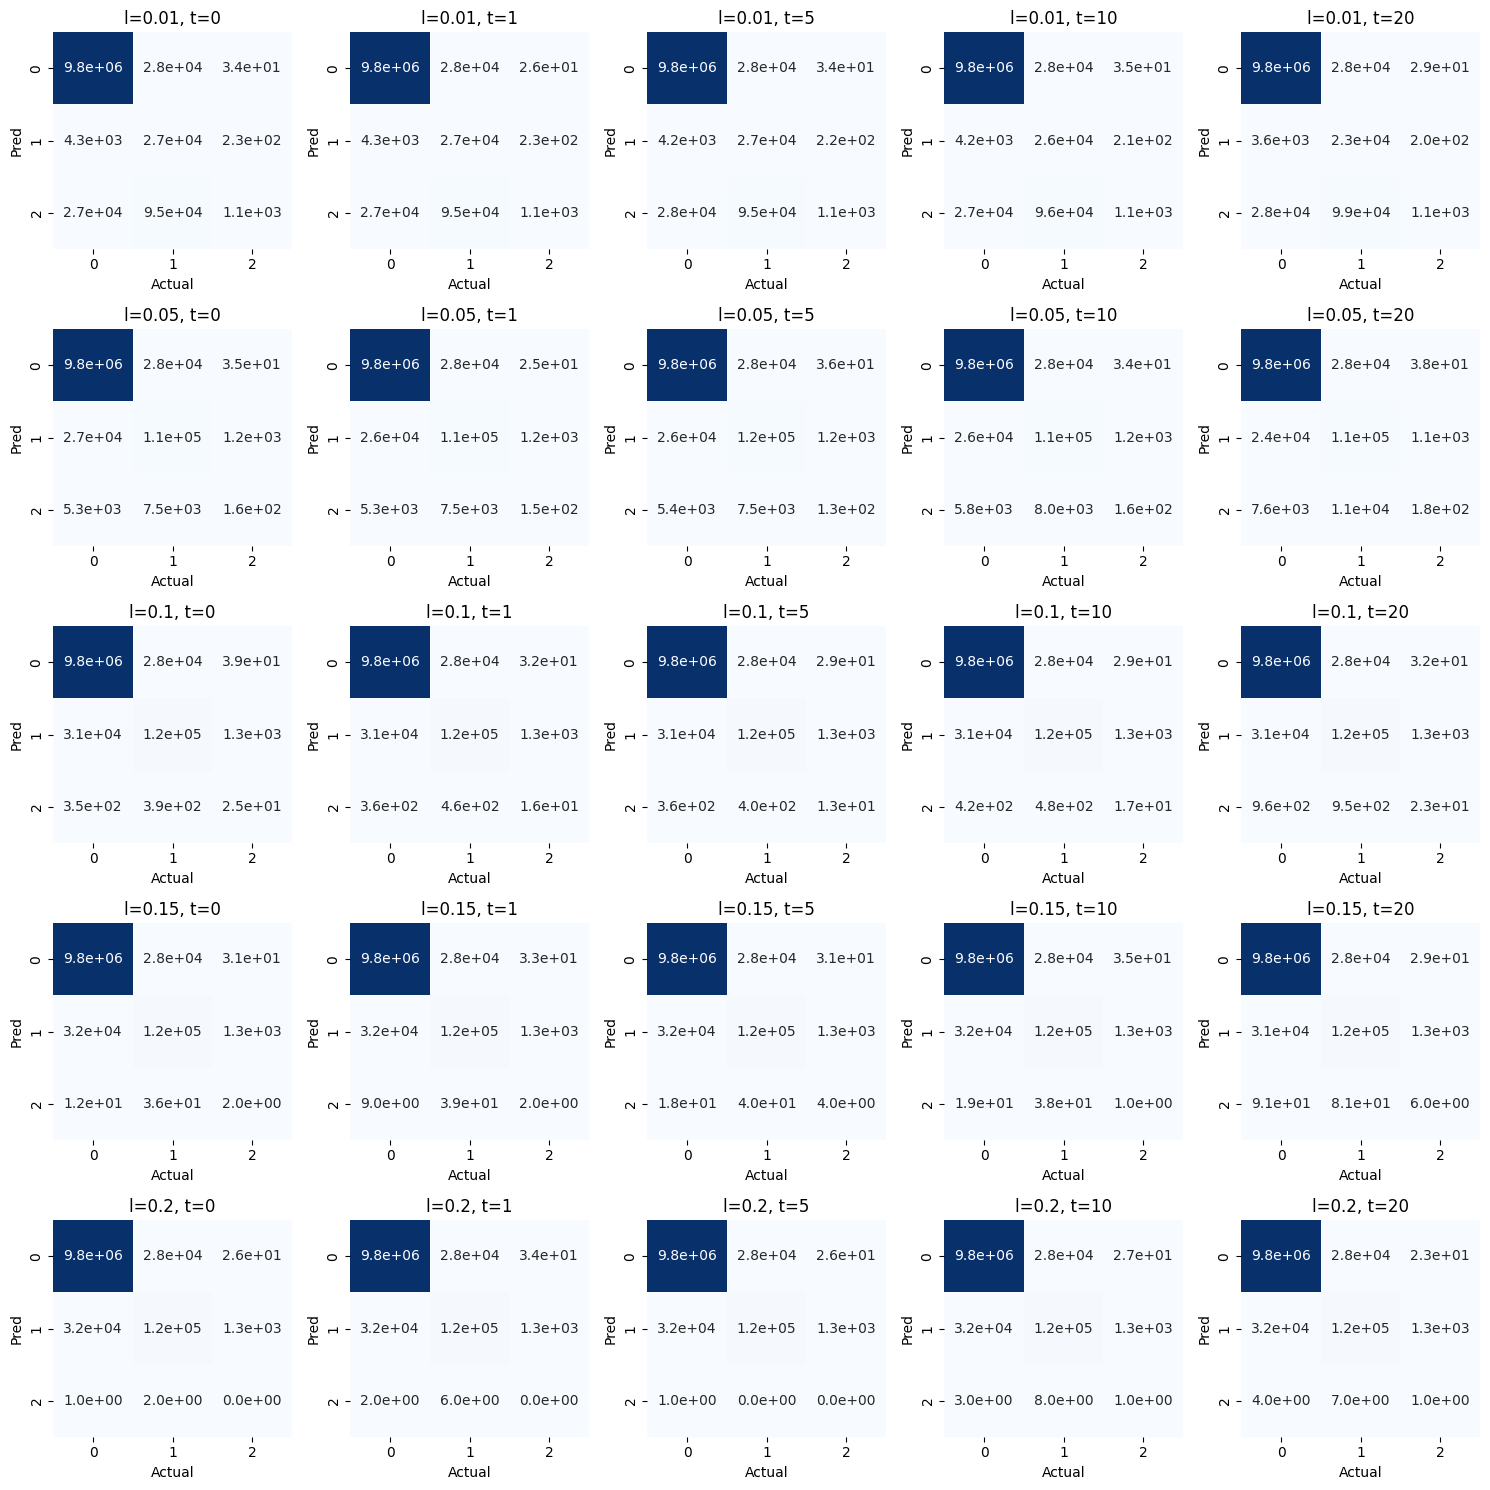

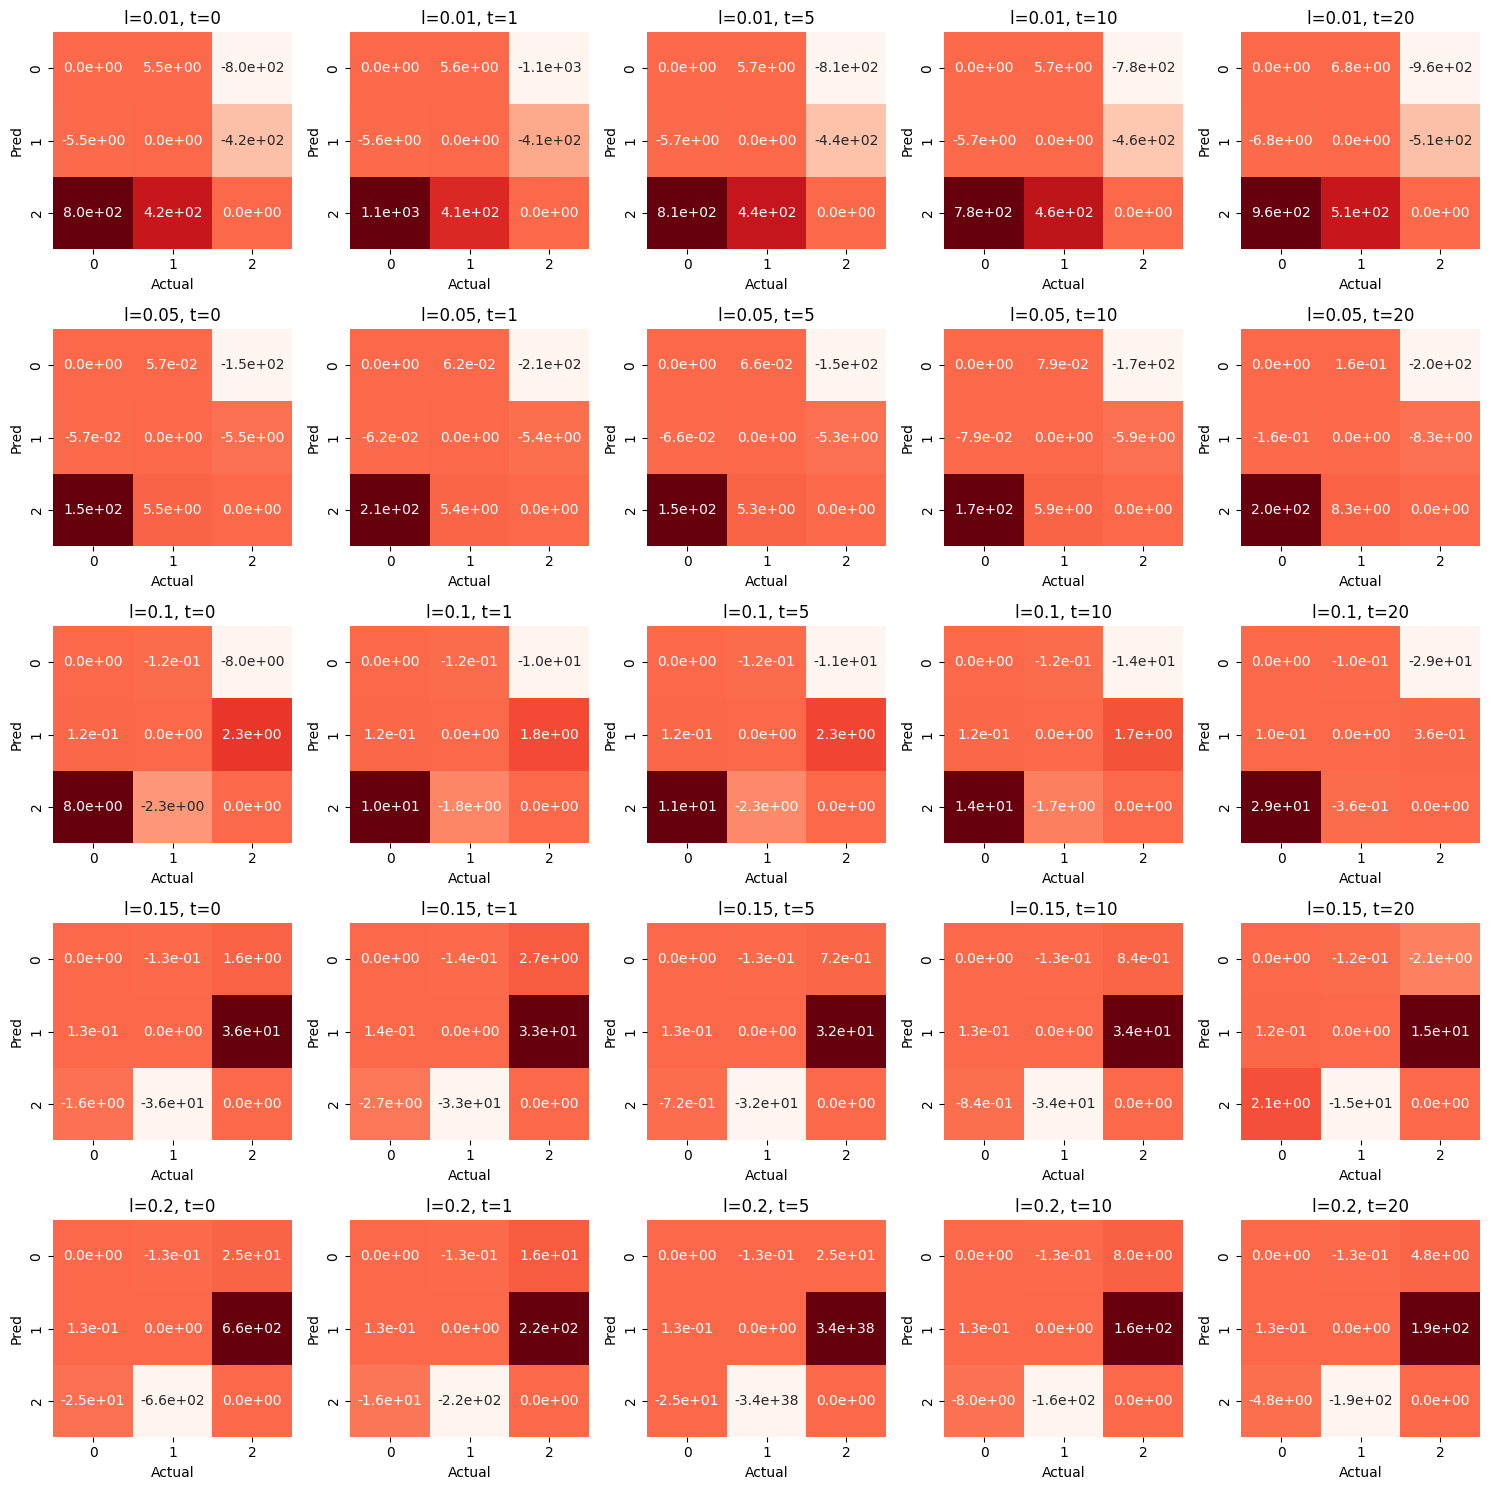

In [10]:
fig, axes = plt.subplots(len(locs_slack_list), len(init_time_list), 
                         figsize=(len(init_time_list) * 3, len(locs_slack_list) * 3))
fig_f, axes_f = plt.subplots(len(locs_slack_list), len(init_time_list), 
                             figsize=(len(init_time_list) * 3, len(locs_slack_list) * 3))
for i, locs_slack in enumerate(locs_slack_list):
    for j, init_time in enumerate(init_time_list):
        dc2_val_dataloader = dc2.val_dataloader()
        cm = torch.zeros((3, 3), dtype=torch.long)
        for batch in tqdm.tqdm(dc2_val_dataloader):
            batch = move_data_to_device(batch, device=device)
            with torch.no_grad():
                double_detect_tile_cat, _ = bliss_encoder.sample(batch, 
                                                                return_inter_output=False,
                                                                locs_slack=locs_slack,
                                                                init_time=init_time)
            true_n_sources = batch["tile_catalog"]["n_sources"].clamp(max=2)  # (b, h, w)
            est_n_sources = double_detect_tile_cat["n_sources"]
            assert true_n_sources.shape == est_n_sources.shape

            confmat = ConfusionMatrix(task="multiclass", num_classes=3).to(device=device)
            cm += confmat(true_n_sources.flatten(), est_n_sources.flatten()).cpu()
        print(f"(ddim_steps={ddim_steps}, locs_slack={locs_slack}, init_time={init_time})")
        print(cm)

        ax = axes[i, j]
        sns.heatmap(cm.numpy(), 
                    annot=True, 
                    fmt=".1e", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"l={locs_slack}, t={init_time}")
        ax.set_xlabel("Actual")
        ax.set_ylabel("Pred")

        cm_d = torch.minimum(cm, cm.T)
        cm_f = ((cm - cm.T) / cm_d).nan_to_num(0.0)
        ax_f = axes_f[i, j]
        sns.heatmap(cm_f.numpy(), 
                    annot=True, 
                    fmt=".1e", cmap="Reds", cbar=False, ax=ax_f)
        ax_f.set_title(f"l={locs_slack}, t={init_time}")
        ax_f.set_xlabel("Actual")
        ax_f.set_ylabel("Pred")

fig.tight_layout()
fig.show()

fig_f.tight_layout()
fig_f.show()